(-6.0, 6.0)

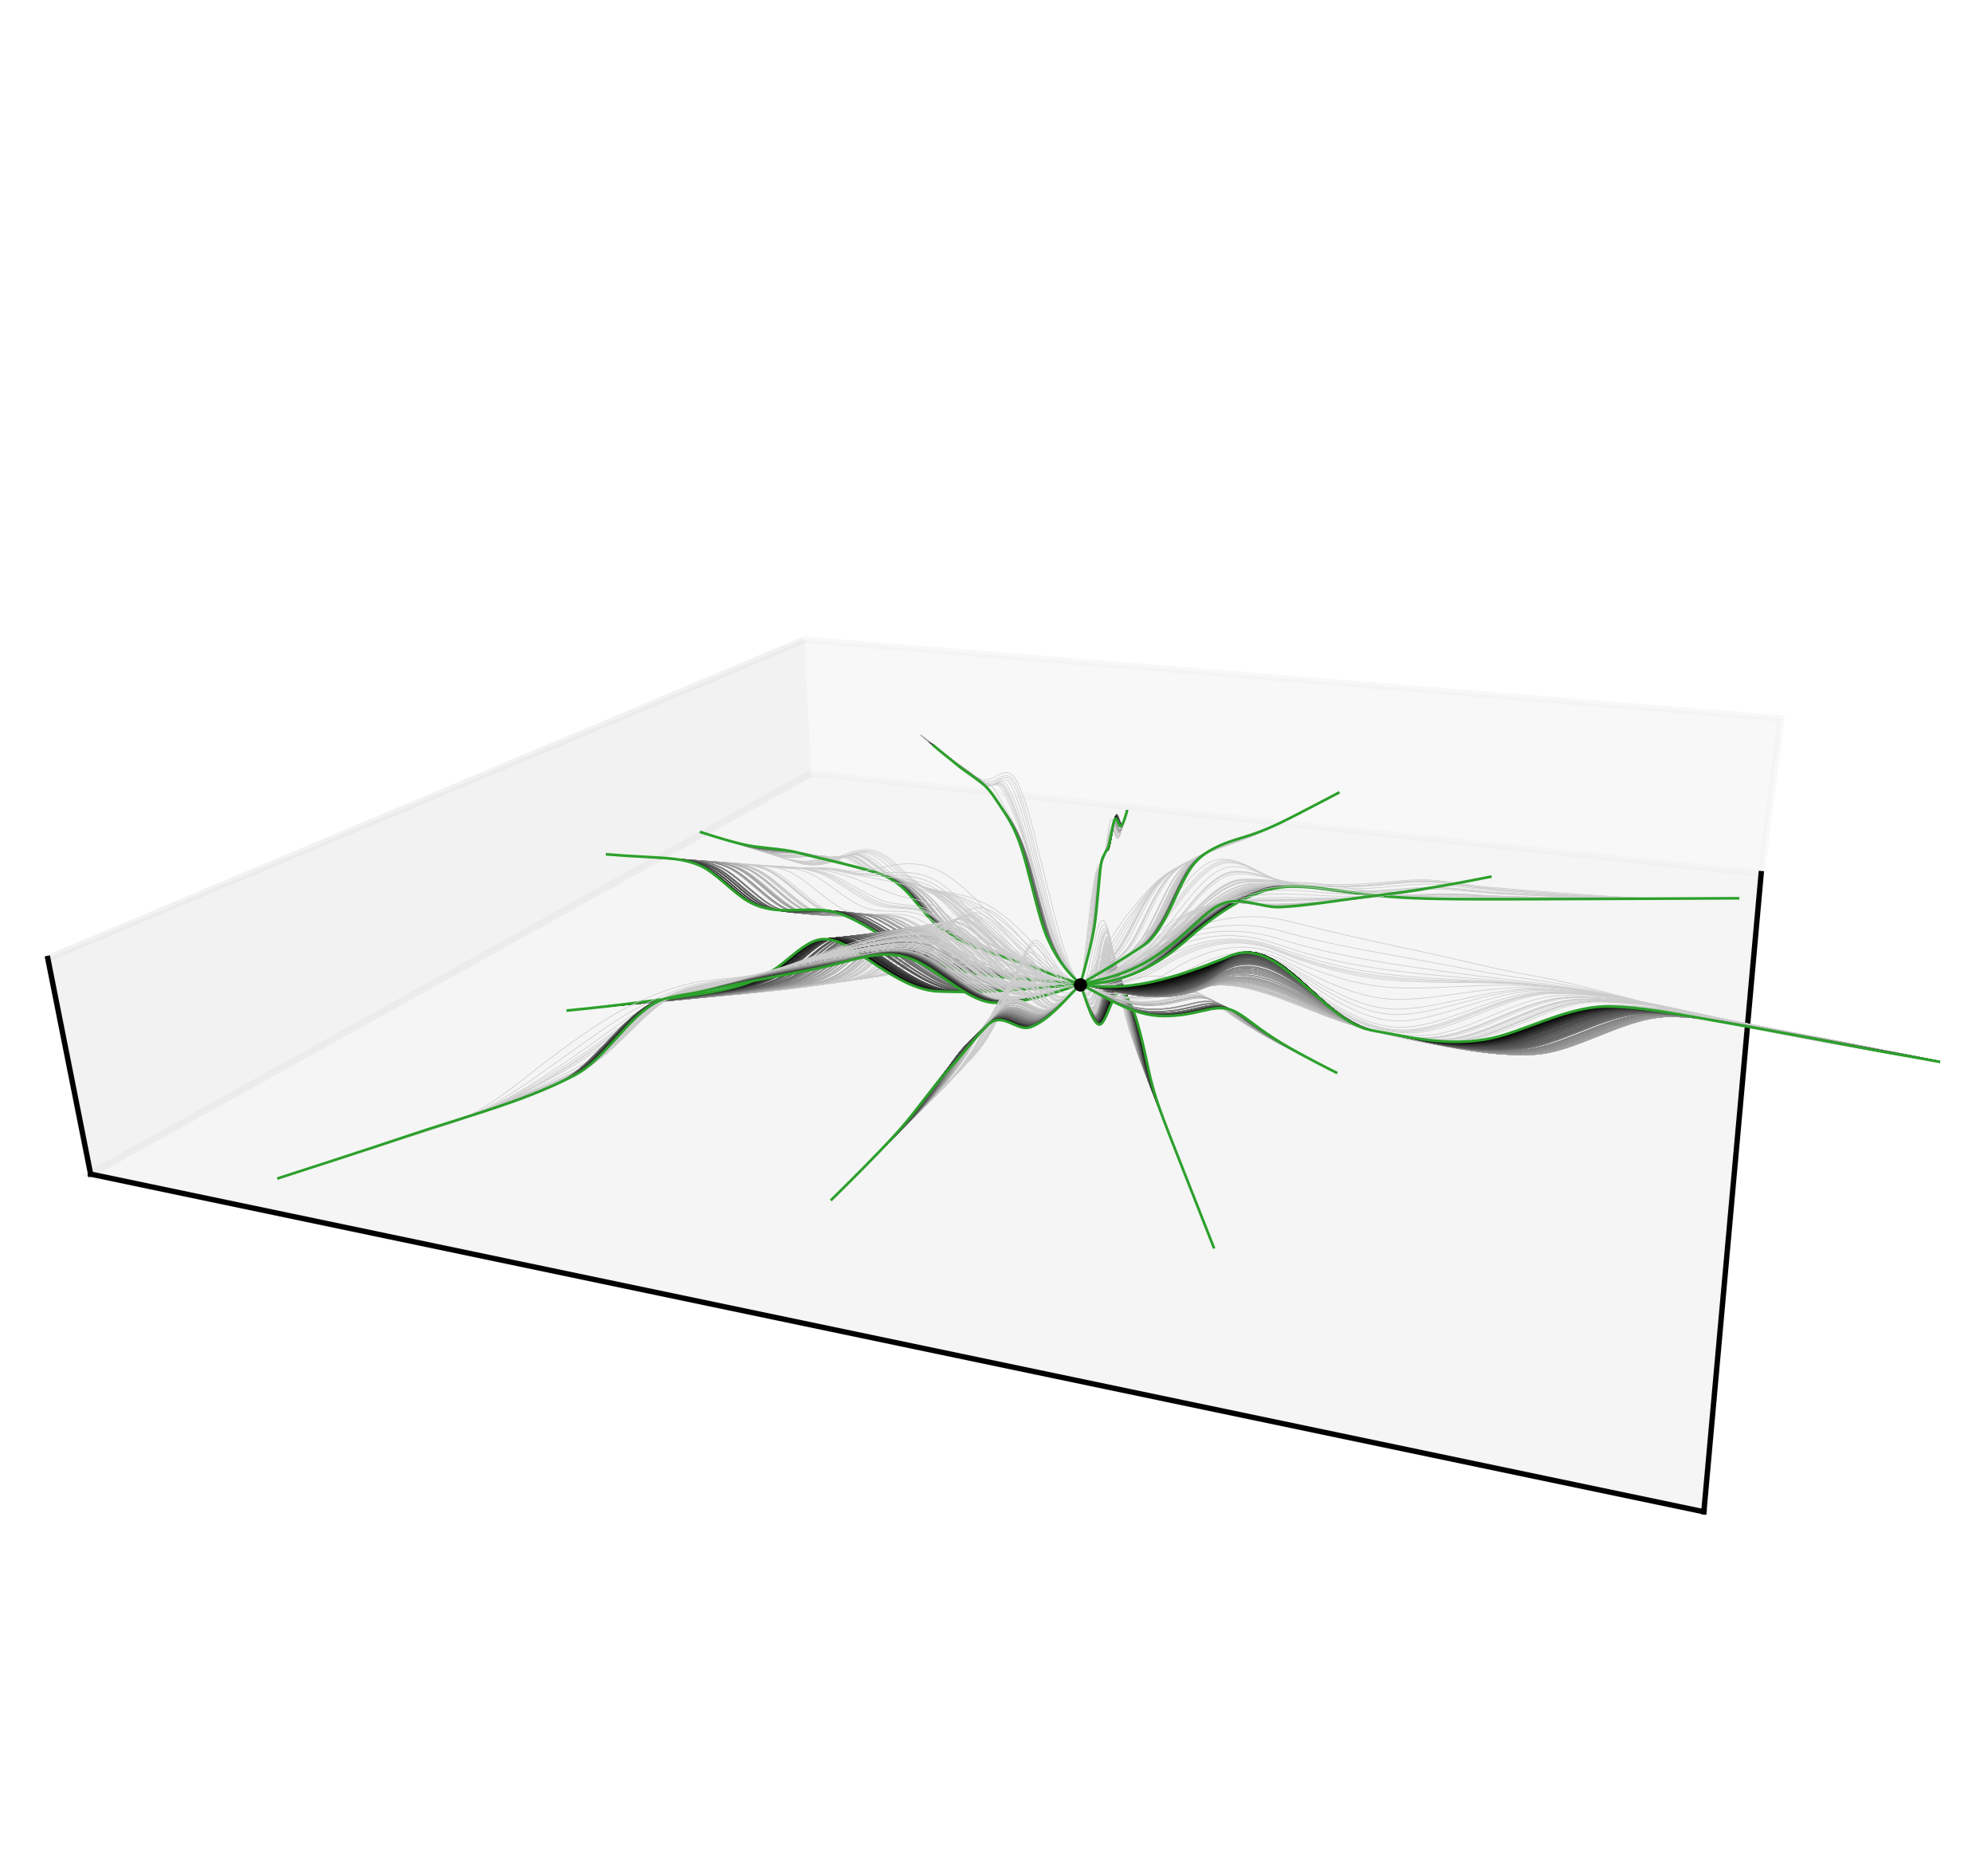

In [16]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


path = '/home/mhyeok/playground/4444'
fits = [dirpath for dirpath, _, filenames in os.walk(path) if "fitlist.npy" in filenames]

fig = plt.figure(dpi=600)
ax = fig.add_subplot(111, projection='3d')

def cylindrical_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

for ist, fit in enumerate(fits):
  fit_list = np.load(os.path.join(fit, 'fitlist.npy'))
  
  theta = 2*np.pi/len(fits) * (ist+1)
  
  gray_scale = matplotlib.colormaps.get('binary', len(fit_list))
  for i in range(len(fit_list)):
  
      x, y = cylindrical_to_cartesian(fit_list[i,0,:], theta)
      if i+1 == len(fit_list):
          
          ax.plot(x, y, fit_list[i,1,:], color='tab:green', linewidth=0.4)
          break
  
      color = gray_scale(max(i / len(fit_list), 0.2))
      ax.plot(x, y, fit_list[i,1,:], color=color, linewidth=0.1)
ax.scatter3D(0,0,0, color='black', s=1)
ax.view_init(20, 20)
ax.set_box_aspect([1, 1, 0.15])
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_proj_type('persp', focal_length=0.2)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
